# I/ Dữ liệu

### Thông tin về dữ liệu:

(note)

# II/ Khám phá dữ liệu:

### Import

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import pandas as pd
import numpy as np
import math
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
df = pd.read_csv('data.csv', encoding = "ISO-8859-1")
df.head()

,id,scientist,Vietnamese Name,field.1,field.2,au.key,au.solo,au.coll,au.uniq,au.vn,...,age,restime,sex,ceb,affil1,affil2,Full affiliation name,prov/coun,region,intexp
0,s001,nguyenngocanh,Nguyen Ngoc Anh,econ,manag,3,0,3,11,9,...,46,20,M,1.0,Depocen,NaN,Dev and Pol Res Center,HN,North,NaN
1,s002,phamntloan,Pham N T Loan,econ,manag,2,1,1,4,1,...,30,4,F,2.0,BUH,NaN,Banking Univ HCM,HCM,South,NaN
2,s003,vuongquanhoang,Vuong Quan Hoang,econ,health,23,11,2,12,10,...,46,20,M,3.0,FPTU,FSB,FBT School of Business,HN,North,NaN
3,s004,nguyenvietcuong,Nguyen Viet Cuong,econ,pol,37,23,14,26,15,...,41,15,M,4.0,NEU,IPMM,"Inst Pub Pol & Manag, Natl Econ Univ",HN,North,NaN
4,s005,giangthanhlong,Giang Thanh Long,pol,econ,11,4,7,12,8,...,42,15,M,4.0,NEU,IPMM,Natl Econ Univ,HN,North,NaN


### Thông tin thuộc tính:

In [3]:
num_rows, num_cols = df.shape
print("Dữ liệu có {} dòng, {} cột.".format(num_rows, num_cols))

Dữ liệu có 412 dòng, 25 cột.


**1. age:**	Tuổi

**2. sex**:	Giới tính

**3. affil**:	During the manual phase, we chose the affiliations where the researchers are full-time employed. During the semi-automatic phase, due to the data structure, we assigned the affiliations according to each paper.

**4. reg**:	Khu vực gồm : North, South, Centre and Overseas

**5. field**:	Lĩnh vực 

**6. ttitems**:	Tổng số ấn phẩm trong Scopus. Đơn vị: (các) mục.

**7. au.solo**:	Số lượng ấn phẩm cá nhân.

**8. au.key**:	  Số lượng ấn phẩm mà đối tượng khảo sát đóng vai trò chủ đạo. Một người được coi là có vai trò chính trong một bài báo khi người đó là tác giả đơn, tác giả đầu tiên hoặc đồng tác giả. Đơn vị: (các) mục.

**9. au.coll**:	Số lượng các ấn phẩm mà đối tượng khảo sát không phải là tác giả chính hay tác giả cá nhân. Do đó, au.co = ttlitems − au.key. Đơn vị: (các) mục.

**10. cp.sdc, cp.eq, cp.fl**:	The measure of relative scientific output. When we calculate this measure manually, the absolute productivity is converted using the method of sequence-determines-credit (cp.sdc)29–31. Then, using the semi-automatic system, we added two more measures: equal contribution for all (cp.eq) and first-last-author emphasis (cp.fl)29,31.

**11. au.vn**:	Số lượng các nhà nghiên cứu Việt Nam mà đối tượng khảo sát là đồng tác giả. Mỗi nhà nghiên cứu Việt Nam chỉ được tính một lần. Đơn vị: người.

**12. au.fr**:	Số lượng nhà nghiên cứu nước ngoài mà đối tượng khảo sát đã đồng tác giả. Mỗi nhà nghiên cứu nước ngoài chỉ được tính một lần. Đơn vị: người.

**13. au.uniq**:  Tổng của au.vn và au.fr. Đơn vị: người

## Tiền xử lý:

In [4]:
#xem thông tin data:
df.info()

if df.isnull().values.any() == False:
    print("=> Không có ô giá trị nào bị thiếu.")
else:
    print("Dữ liệu bị thiếu.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     412 non-null    object 
 1   scientist              412 non-null    object 
 2   Vietnamese Name        412 non-null    object 
 3   field.1                412 non-null    object 
 4   field.2                412 non-null    object 
 5   au.key                 412 non-null    int64  
 6   au.solo                412 non-null    int64  
 7   au.coll                412 non-null    int64  
 8   au.uniq                412 non-null    int64  
 9   au.vn                  412 non-null    int64  
 10  au.fc                  412 non-null    int64  
 11  au.ttl                 412 non-null    float64
 12  ttlitems               412 non-null    int64  
 13   cp                    412 non-null    float64
 14  title                  412 non-null    int64  
 15  age   

# III/ Trực quan hóa:

## Nội dung trực quan:


>1. Lĩnh vực nghiên cứu của các nhà khoa học.

> 2. (note)

> . (note)

> . (note)

> . (note)

> . (note)

> . (note)

> . (note)

> . (note)

> . (note)

> . (note)


## Trực quan bằng biểu đồ:

1. Lĩnh vực nghiên cứu của các nhà khoa học.

In [5]:
df.columns

Index(['id', 'scientist', 'Vietnamese Name', 'field.1', 'field.2', 'au.key',
       'au.solo', 'au.coll', 'au.uniq', 'au.vn', 'au.fc', 'au.ttl', 'ttlitems',
       ' cp ', 'title', 'age', 'restime', 'sex', 'ceb', 'affil1', 'affil2',
       'Full affiliation name', 'prov/coun', 'region', 'intexp'],
      dtype='object')

In [14]:
data = df[['au.solo','au.key','ttlitems',' cp ','au.uniq']]
a = pd.DataFrame(data.apply(np.mean,axis = 0))
b = a.T
b

,au.solo,au.key,ttlitems,cp,au.uniq
0,0.728155,1.762136,3.56068,2.382379,6.529126


In [15]:
labels = []
for label in b.columns:
    labels.append(str(label))
print(labels)

['au.solo', 'au.key', 'ttlitems', ' cp ', 'au.uniq']


In [16]:
def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

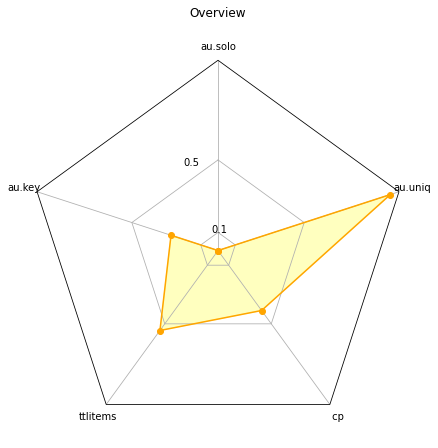

In [18]:
index_row = 0 # Lấy dòng cần vẽ

N = len(labels) # Tính số thuộc tính (số cột)

# Tạo góc dạng polygon, chia theo số thuộc tính
# => Nếu có 5 cột thì là ngũ giác, đoán vậy :v
theta = radar_factory(N, frame='polygon') 

# Lấy tên của các thg mình đang vẽ
title = 'Overview'

# Tạo figure kích thước bla bla
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(projection='radar'))

# Tạo lưới thang đo 0 -> 1
ax.set_rgrids([0.1,0.5])

# Đặt title cho figure
ax.set_title(title,  position=(0.5, 1.1), ha='center')

# Chỗ này nãy làm trường hợp vẽ nhiều dòng
'''for i in range(2):
    d = data.loc[i].values/np.max(data.loc[i].values)
    line = ax.plot(theta, d)
    ax.fill(theta, d,  alpha=0.25)'''

# Chuẩn hoá dữ liệu về khoảng [0,1]
d = data.loc[index_row].values/np.max(data.loc[index_row].values)
# Vẽ đường nối các điểm dữ liệu, giao điểm hình chấm tròn (-o),
# Có thể đổi kiểu khác như -* là ngôi sao, -x là dấu chéo,... :v
# Tham số color là màu, muốn để mặc định thì xoá đi
line = ax.plot(theta, d, '-o', color = 'orange') 

ax.fill(theta, d,  alpha = 0.25, color = 'yellow') # Tô màu, alpha là độ đậm của màu tô
ax.set_varlabels(labels) # Set label cho các đỉnh

plt.show() # Hiển thị

### Nhận xét:

- Từ hình vẽ ta thấy thì các nghiên cứu ở Việt Nam hầu như không làm 1 mình, đều phải có những cộng sự trong nước hay ở nước ngoài. Chứng tỏ công việc nghiên cứu là 1 công việc khó khăn, cần sự kiên trì không ngừng nghỉ nên khó có thể thực hiện 1 mình

- Độ ứng dụng của các nghiên cứu này còn thấp, chưa được 50%. Chứng tỏ đề tài họ nghiên cứu khá xa vời so với thực tế. Điều này cũng khá là dễ hiểu đối với 1 nước nặng những kiến thức lý thuyết, ít thực hành như ở Việt Nam

- Tống số nghiên cứu trung bình của 1 người cũng chưa được cao, bởi vì đối với 1 môi trường đặc thù như ở Việt Nam. Cơ sở vật chất và nhà nước đầu tư vào các nghiên cứu vẫn chưa nhiều, đa số là tự phát. Và nghiên cứu cần có những bằng cấp đặc biệt. Tuy nhiên, ở Việt Nam thì tình trạng tiến sỹ giấy rất nhiều, hầu như những nghiên cứu áp dụng được đều bộc phát từ những người nông dân. Đây là 1 điều đáng báo động với nền giáo dục Việt 